In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import scienceplots
import os
import seaborn as sns

plt.style.use(['science', 'bright'])
plt.rcParams['figure.dpi'] = 300

# sbc

In [3]:
calibration = torch.load(os.path.join('..', 'results', 'calibration', 'sbc_0.pt'))

ranks = calibration['ranks']
thetas = calibration['thetas']
dap_samples = calibration['dap_samples']
num_posterior_samples = calibration['num_posterior_samples']
num_sbc_samples = calibration['num_sbc_samples']

print(num_sbc_samples)
print(num_posterior_samples)

200
1000


C:\Users\Julian\AppData\Local\Temp\ipykernel_11608\1626534924.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  calibration = torch.load(os.path.join('..', 'results', 'cal

In [4]:
from sbi.diagnostics import check_sbc

check_stats = check_sbc(
    ranks, thetas, dap_samples, num_posterior_samples=num_posterior_samples
)

print(f"""kolmogorov-smirnov p-values = {check_stats['ks_pvals'].numpy()}""")
print(f"c2st accuracies = {check_stats['c2st_ranks'].numpy()}")
print(f"- c2st accuracies = {check_stats['c2st_dap'].numpy()}")

c:\Users\Julian\anaconda3\envs\sbi_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


kolmogorov-smirnov p-values = [3.8697359e-03 1.1120970e-02 3.1601558e-05 7.9651521e-09 4.0897316e-01]
c2st accuracies = [0.54   0.4975 0.485  0.585  0.51  ]
- c2st accuracies = [0.49   0.435  0.545  0.47   0.4775]


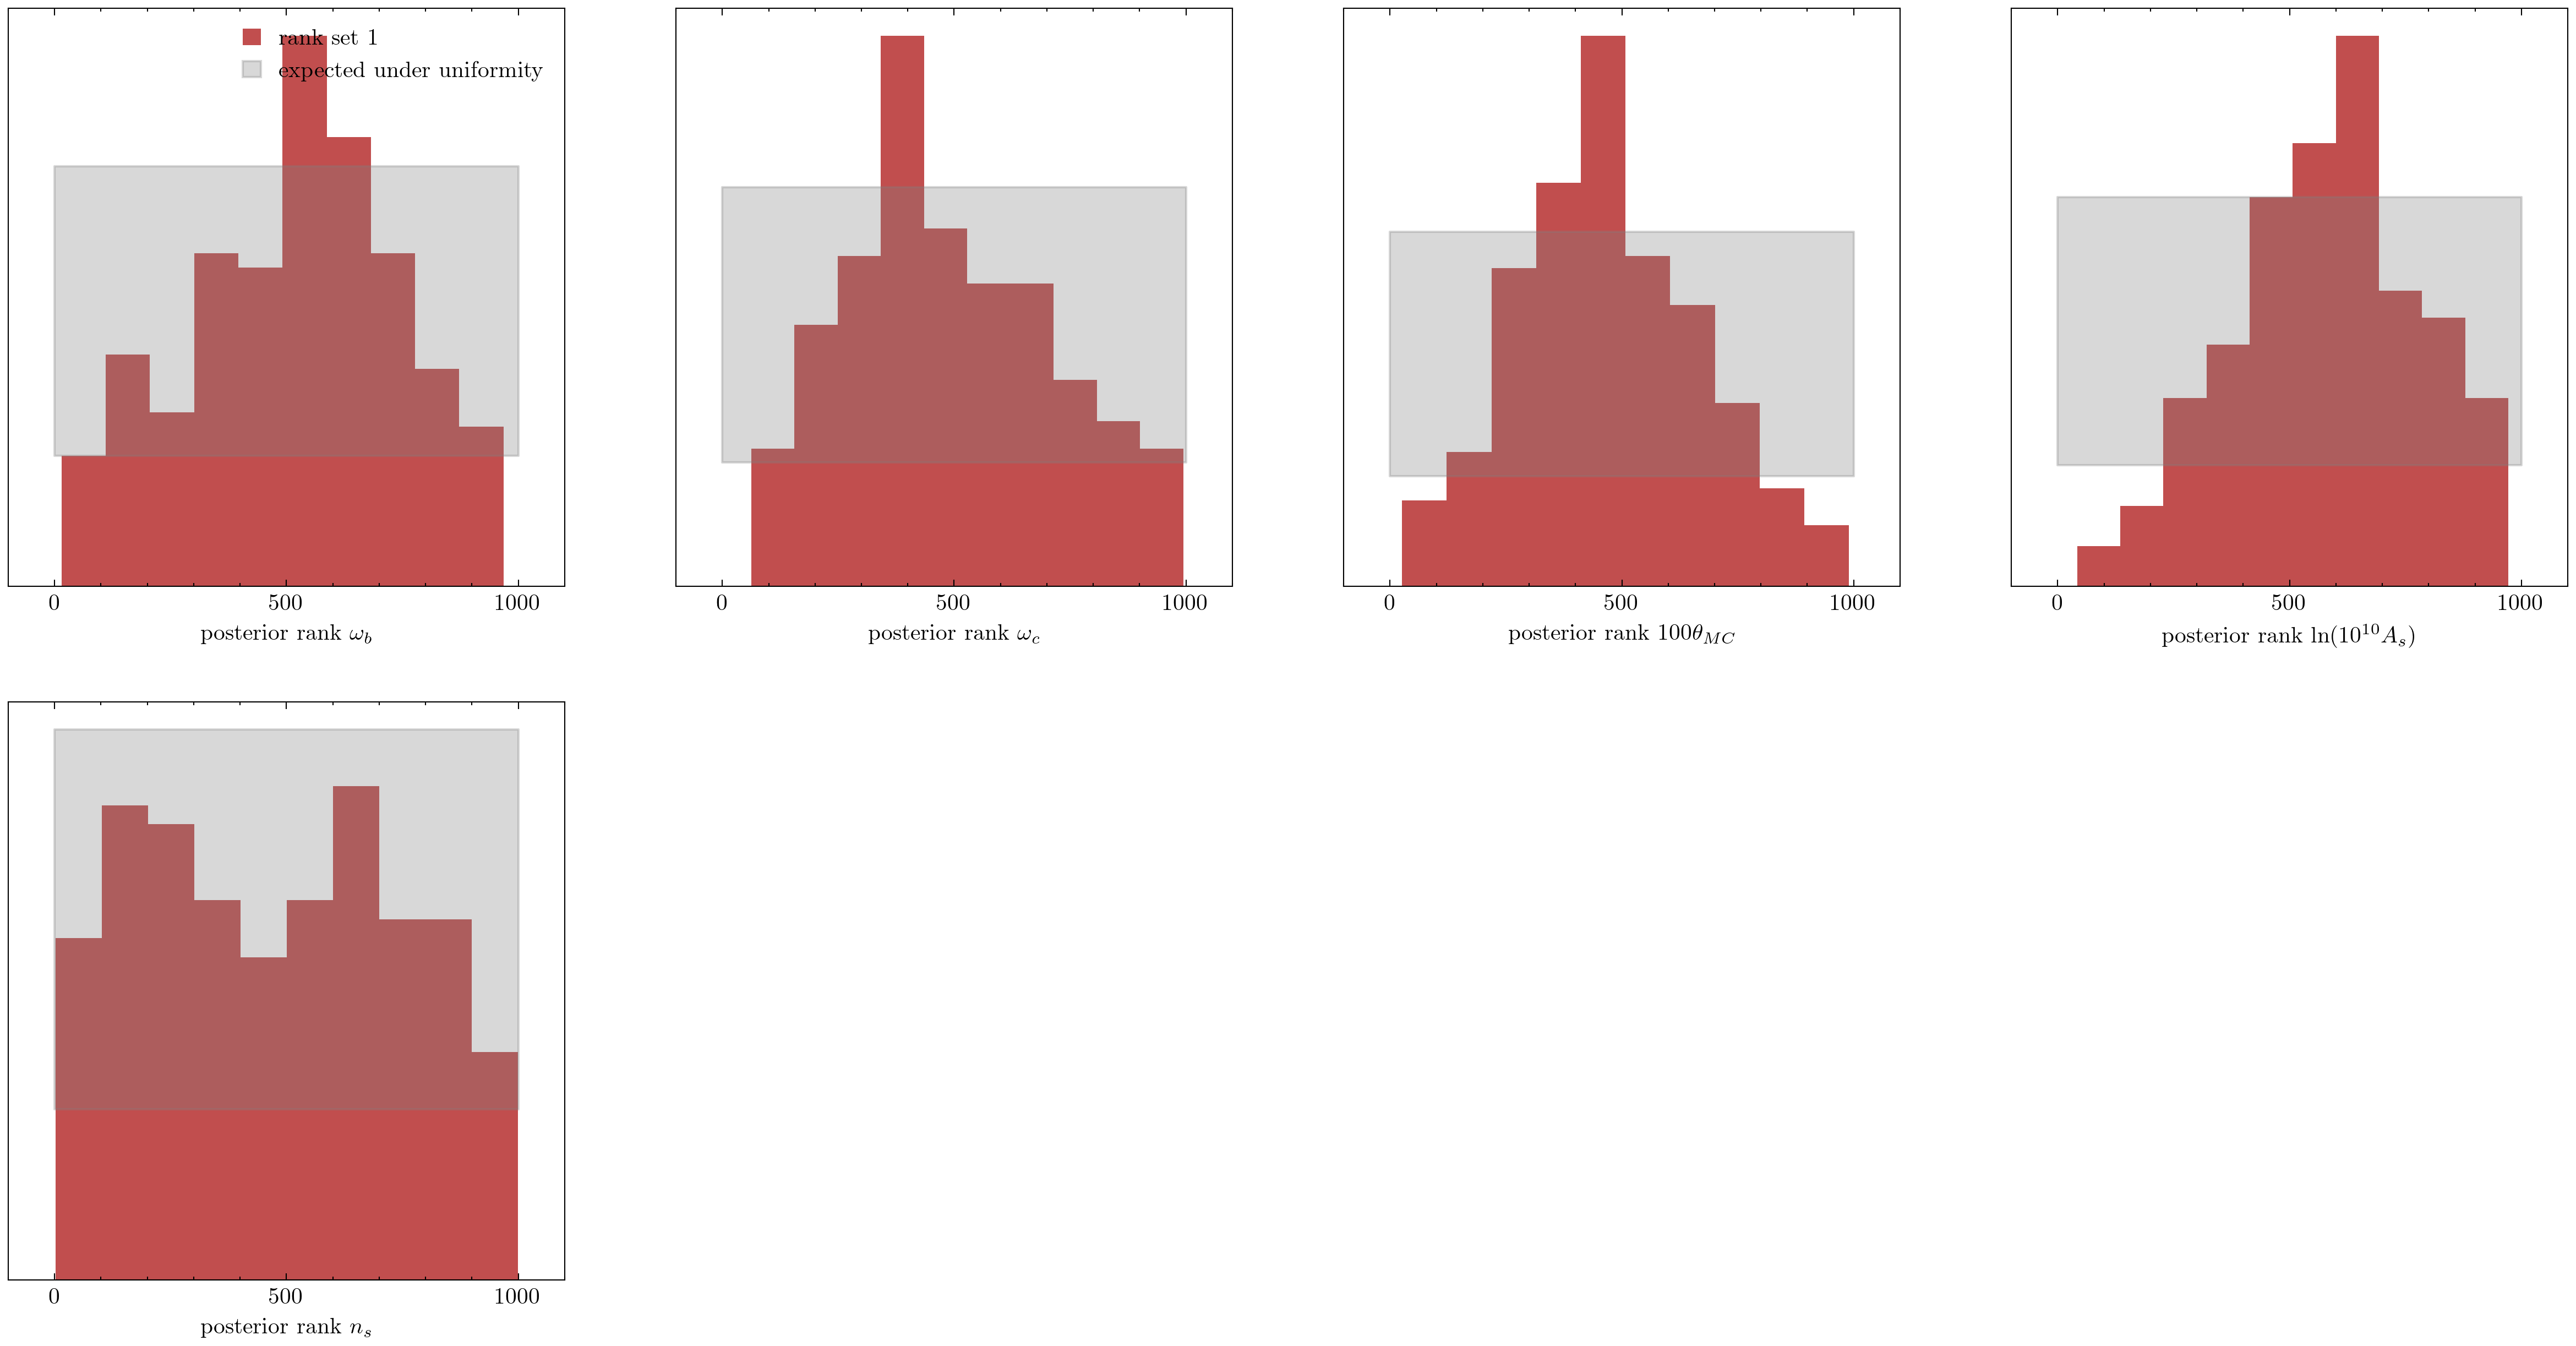

In [4]:
from sbi.analysis.plot import sbc_rank_plot

param_names = [r'$\omega_b$', r'$\omega_c$', r'$100\theta_{MC}$', r'$\ln(10^{10}A_s)$', r'$n_s$']

f, ax = sbc_rank_plot(
    ranks=ranks,
    num_posterior_samples=num_posterior_samples,
    plot_type="hist",
    num_bins=None, 
    parameter_labels=param_names 
)

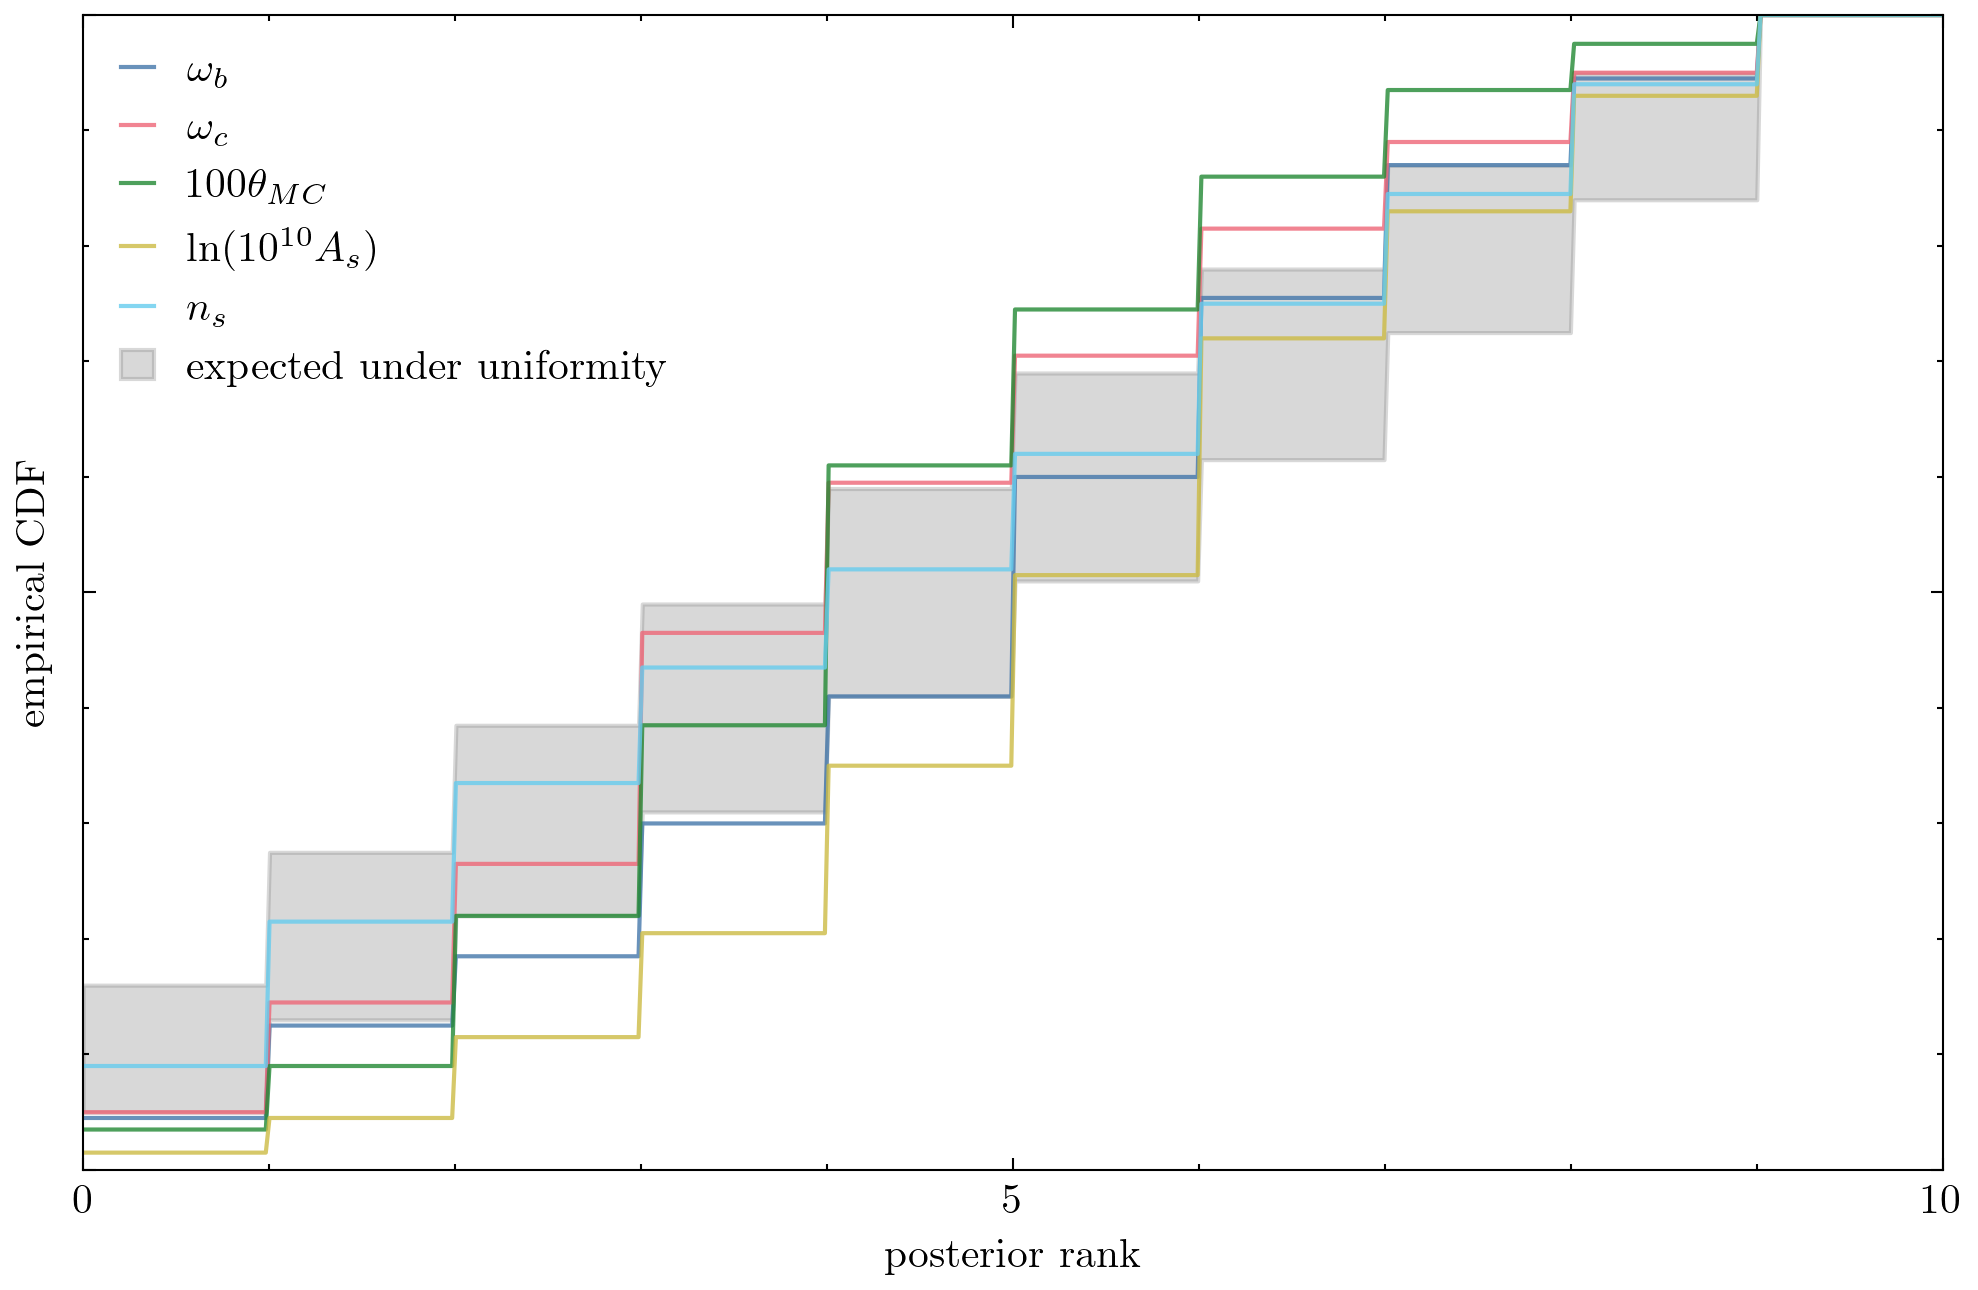

In [5]:
f, ax = sbc_rank_plot(
    ranks=ranks,
    num_posterior_samples=num_posterior_samples,
    plot_type="cdf",
    num_bins=None,  
    parameter_labels=param_names
)

# tarp

In [6]:
calibration = torch.load(os.path.join('..', 'results', 'calibration', 'tarp_2.pt'))

ecp = calibration['ecp']
thetas = calibration['thetas']
alpha = calibration['alpha']
num_posterior_samples = calibration['num_posterior_samples']
num_tarp_samples = calibration['num_tarp_samples']

print(num_tarp_samples)
print(num_posterior_samples)

1000
5000


C:\Users\Julian\AppData\Local\Temp\ipykernel_1892\2276741012.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  calibration = torch.load(os.path.join('..', 'results', 'cali

In [7]:
from sbi.diagnostics import check_tarp

atc, ks_pval = check_tarp(ecp, alpha)

print(atc, "Should be close to 0")
print(ks_pval, "Should be larger than 0.05")

1.0217993259429932 Should be close to 0
0.9634297148886908 Should be larger than 0.05


(<Figure size 1800x1800 with 1 Axes>,
 <Axes: xlabel='Credibility Level $\\alpha$', ylabel='Expected Coverage Probability'>)

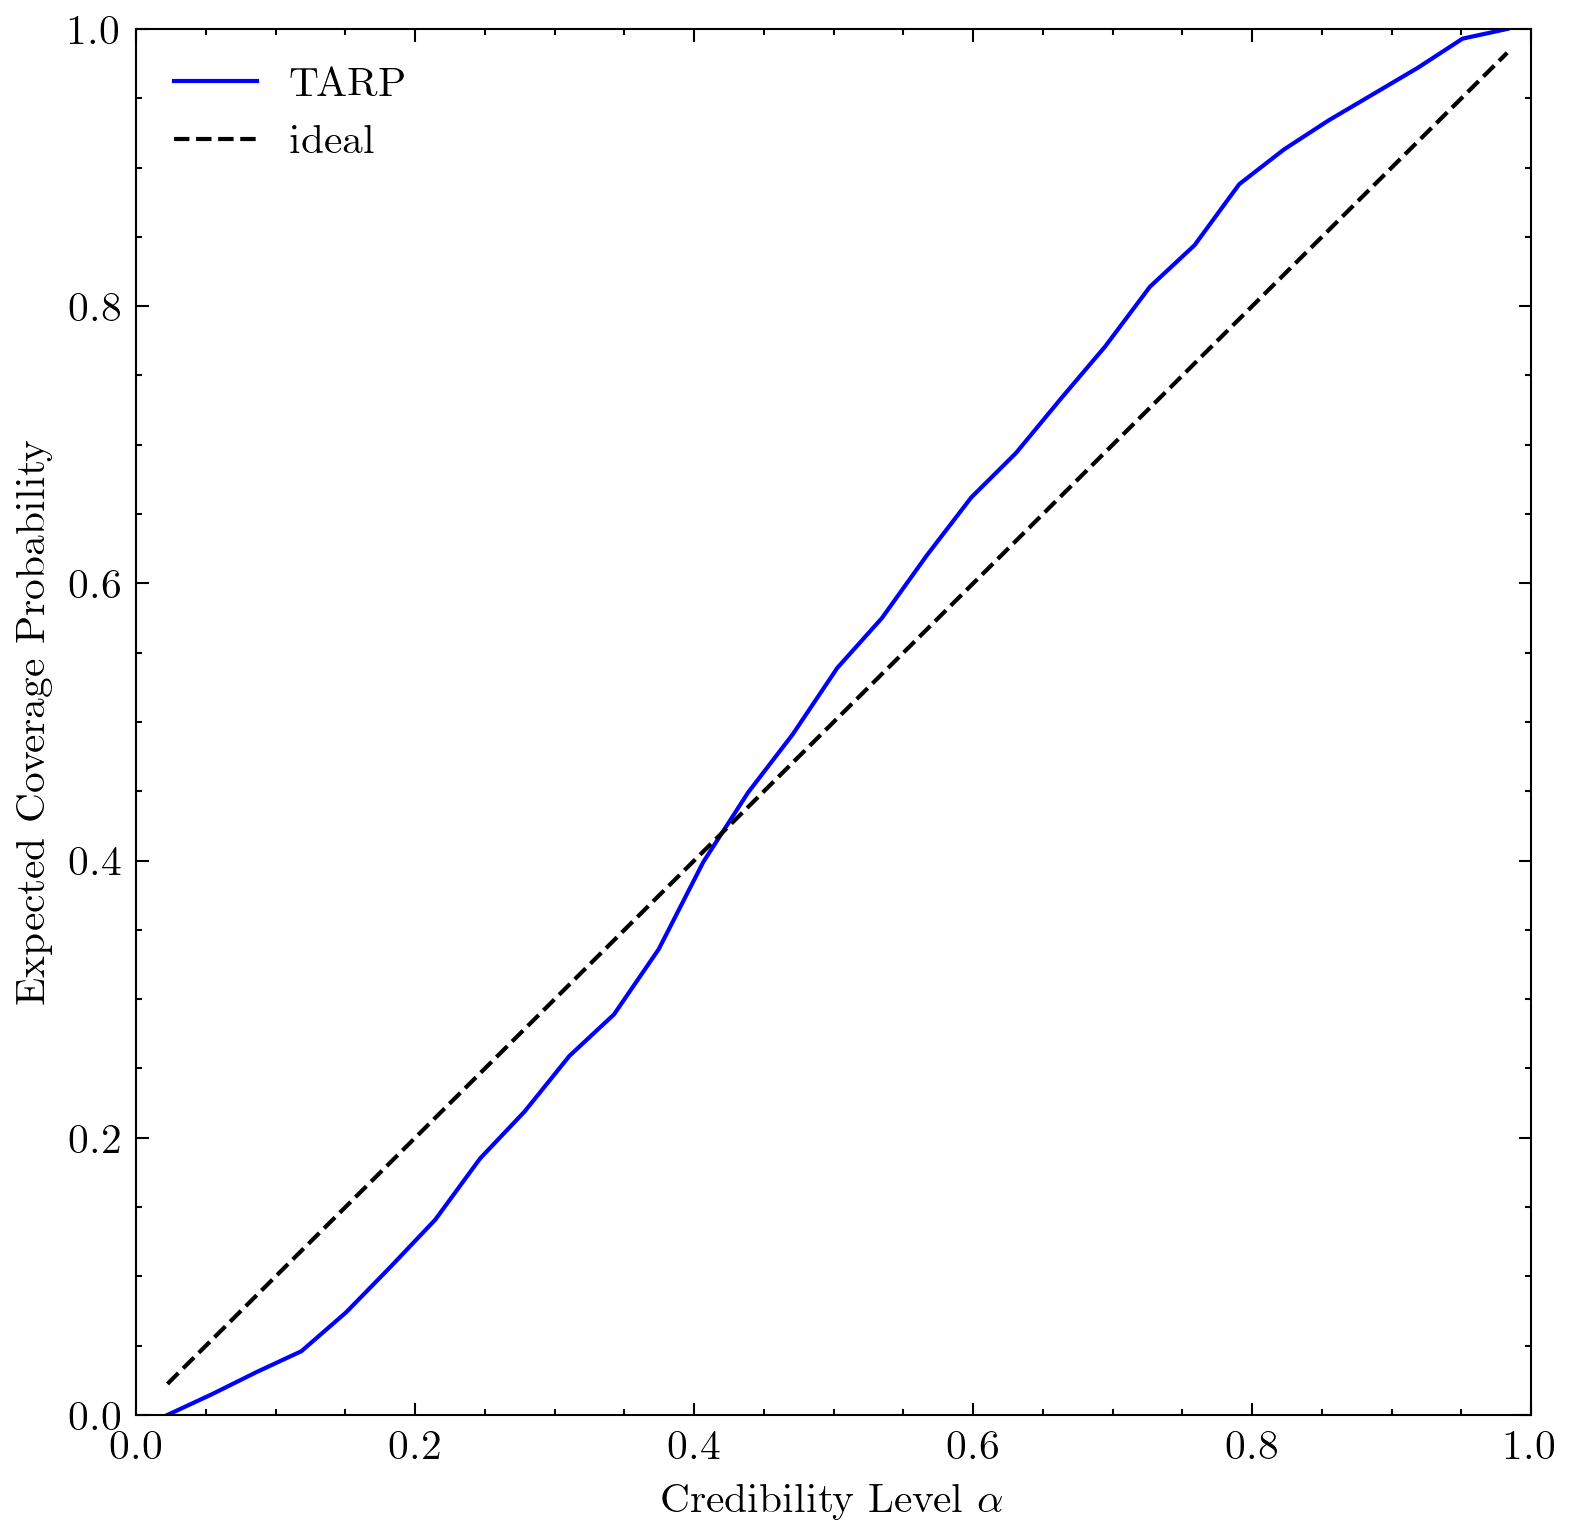

In [8]:
from sbi.analysis.plot import plot_tarp

plot_tarp(ecp, alpha)

1000
5000
1.0281996726989746 Should be close to 0
0.999115261755522 Should be larger than 0.05


C:\Users\Julian\AppData\Local\Temp\ipykernel_1892\4006951054.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  calibration = torch.load(os.path.join('..', 'results', 'cali

(<Figure size 1800x1800 with 1 Axes>,
 <Axes: xlabel='Credibility Level $\\alpha$', ylabel='Expected Coverage Probability'>)

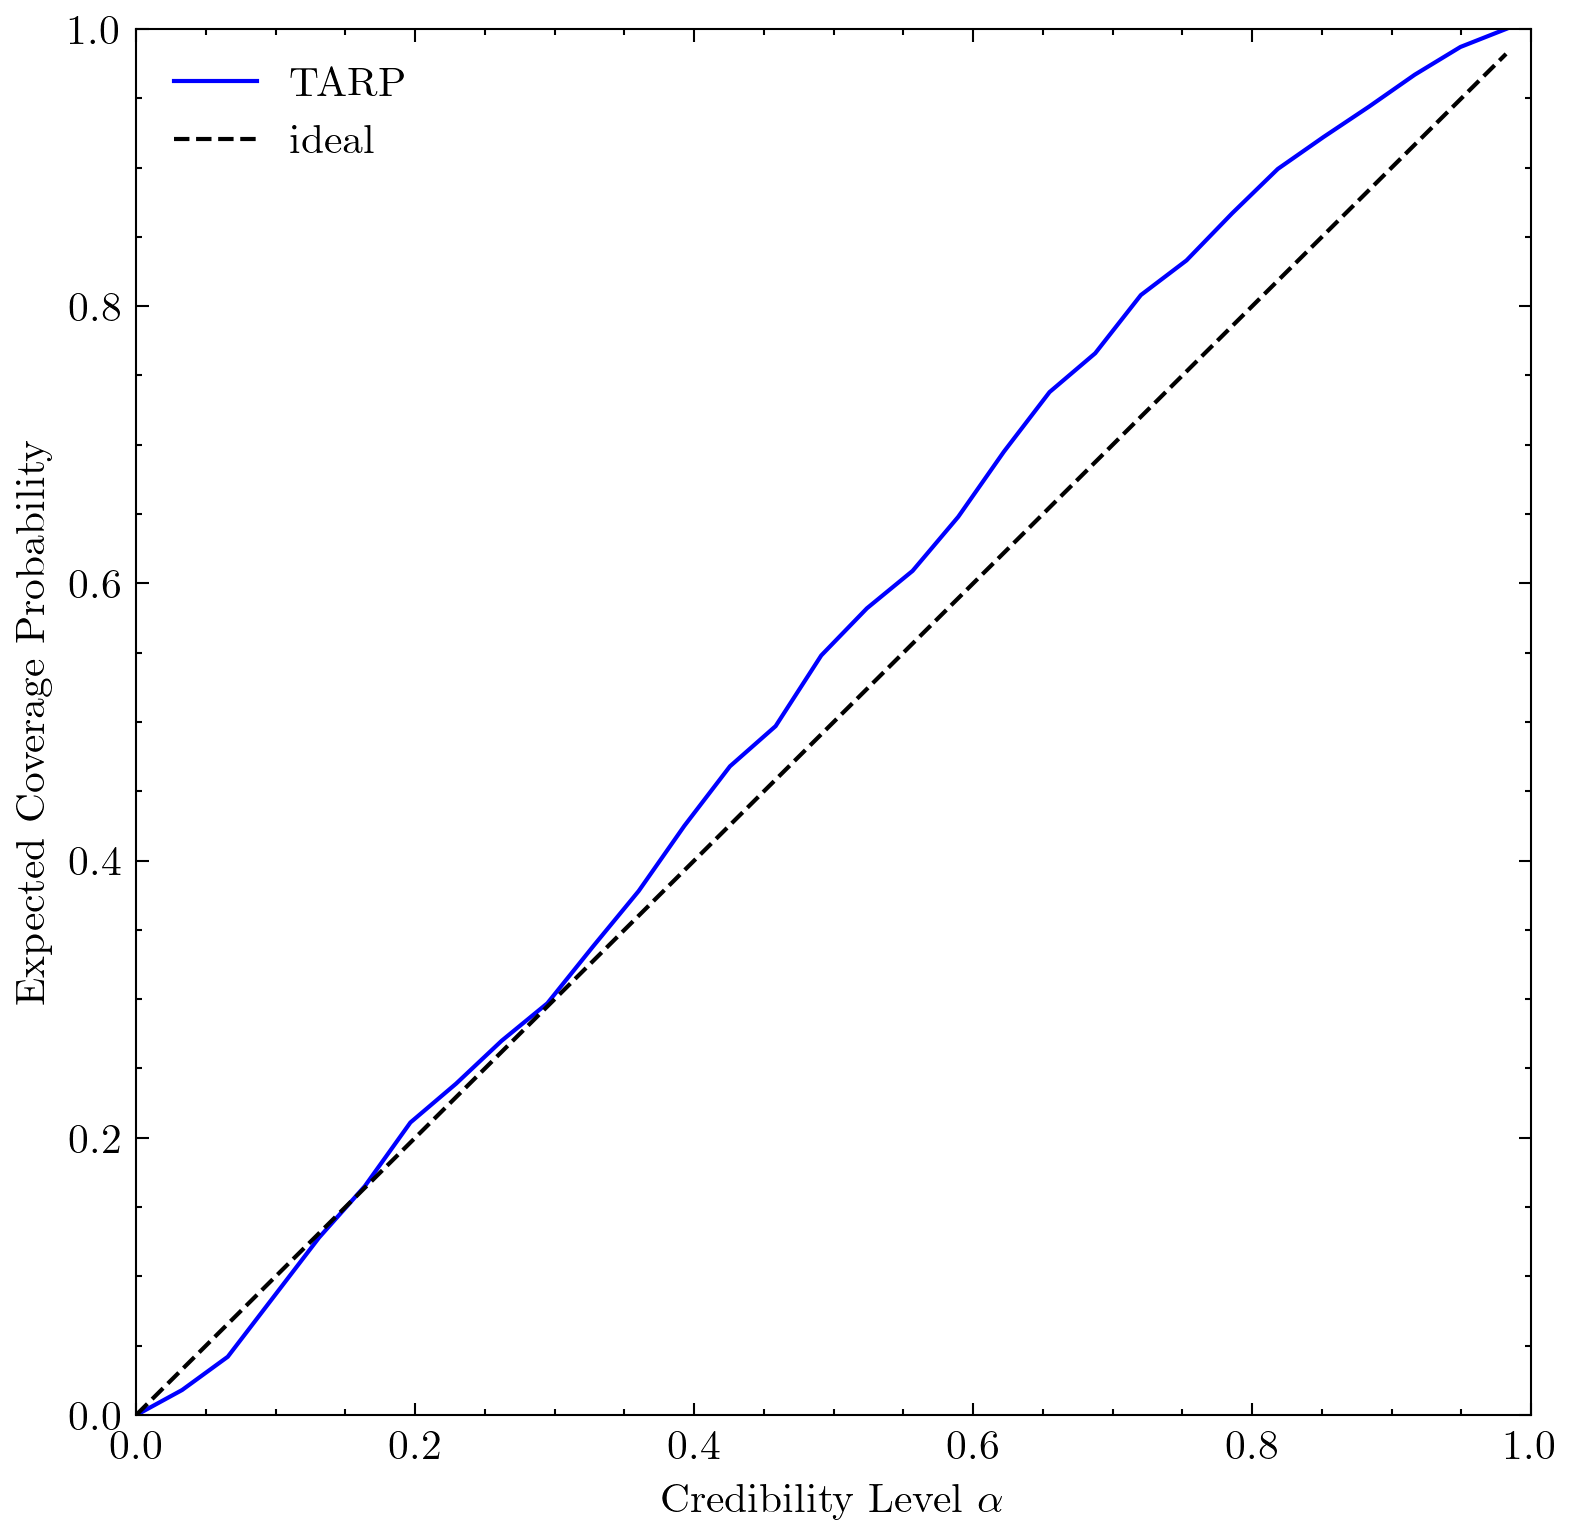

In [9]:
calibration = torch.load(os.path.join('..', 'results', 'calibration', 'tarp_3.pt'))

ecp = calibration['ecp']
thetas = calibration['thetas']
alpha = calibration['alpha']
num_posterior_samples = calibration['num_posterior_samples']
num_tarp_samples = calibration['num_tarp_samples']
atc, ks_pval = check_tarp(ecp, alpha)

print(num_tarp_samples)
print(num_posterior_samples)
print(atc, "Should be close to 0")
print(ks_pval, "Should be larger than 0.05")
plot_tarp(ecp, alpha)